In [34]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
data=pd.read_csv("/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv")
print(data.shape)
data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [36]:
data.tail(10)

,review,sentiment
49990,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative
49991,"Les Visiteurs, the first movie about the medie...",negative
49992,John Garfield plays a Marine who is blinded by...,positive
49993,Robert Colomb has two full-time jobs. He's kno...,negative
49994,This is your typical junk comedy.<br /><br />T...,negative
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [37]:
data["sentiment"].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [38]:
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
data = data.infer_objects(copy=False)
data.head(10)

/tmp/ipykernel_23/4032450047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
5,"Probably my all-time favorite movie, a story o...",1
6,I sure would like to see a resurrection of a u...,1
7,"This show was an amazing, fresh & innovative i...",0
8,Encouraged by the positive comments about this...,0
9,If you like original gut wrenching laughter yo...,1


In [39]:
data["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [40]:
#spliting
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)

In [41]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [42]:
#preprocessing
#tokenizing
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
x_train=pad_sequences(tokenizer.texts_to_sequences(train_data["review"]),maxlen=200)
x_test=pad_sequences(tokenizer.texts_to_sequences(test_data["review"]),maxlen=200)

In [43]:
print(x_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [44]:
print(x_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [45]:
y_train=train_data['sentiment']
y_test=test_data['sentiment']
print(y_train)
print(y_test)


39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64
33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64


In [55]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128 ,input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.build(input_shape=(None, 200)) 

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [79]:
history=model.fit(x_train,y_train,epochs=5,batch_size=64,validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.9052 - loss: 0.2401 - val_accuracy: 0.8684 - val_loss: 0.3271
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 221ms/step - accuracy: 0.9252 - loss: 0.1969 - val_accuracy: 0.8561 - val_loss: 0.3587
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.9276 - loss: 0.1876 - val_accuracy: 0.8733 - val_loss: 0.3395
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 221ms/step - accuracy: 0.9406 - loss: 0.1539 - val_accuracy: 0.8845 - val_loss: 0.3508
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 110s 220ms/step - accuracy: 0.9509 - loss: 0.1305 - val_accuracy: 0.8791 - val_loss: 0.3899


In [80]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f"Test Loss:{loss}")
print(f"Test AcCuracy:{accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8768 - loss: 0.3756
Test Loss:0.37347736954689026
Test AcCuracy:0.8792999982833862


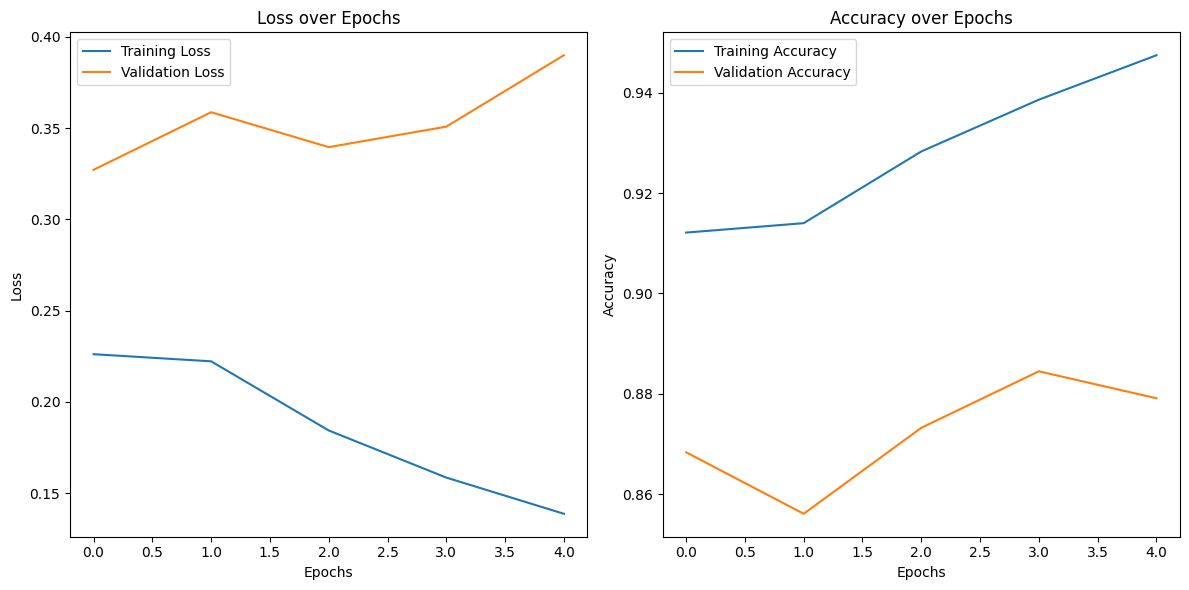

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

#training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
def predict(review):
    #tokenize & pad
    sequence=tokenizer.texts_to_sequences([review])
    padded_sequence=pad_sequences(sequence,maxlen=200)
    prediction=model.predict(padded_sequence)
    sentiment='positive' if prediction[0][0]>0.5 else 'negetive'
    return sentiment

In [85]:
new_review="This movie was not that good, i hate it"
sentiment=predict(new_review)
print(f"THe sentiment of this review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
THe sentiment of this review is: negetive


In [86]:
new_review="This movie was fantastic, i adore it"
sentiment=predict(new_review)
print(f"THe sentiment of this review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
THe sentiment of this review is: positive


313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step


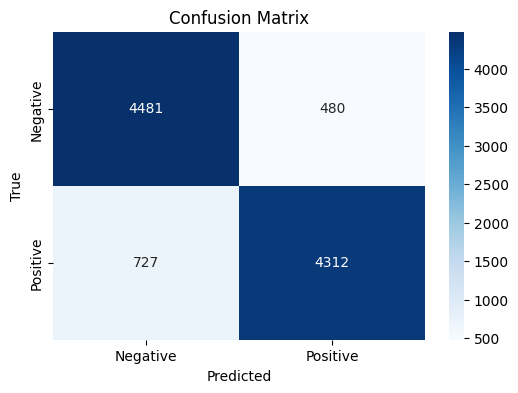

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)  

cm = confusion_matrix(y_test, y_pred)

#confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [94]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")